## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("parallel_results.csv")

In [3]:
data

,year,title,performer,weeks_on_chart,loudness,mean_active_notes,change_frequency,unique_chords,weighted_std,dynamic_range
0,1958,Chantilly Lace,Big Bopper,22,-11.451494,4.653588,1.836194,7.0,134.575865,1026.026546
1,1958,Rock-in Robin,Bobby Day,21,-14.456335,4.935692,2.260231,7.0,82.887744,677.105994
2,1958,It's All In The Game,Tommy Edwards,20,-16.144805,4.348993,1.583321,7.0,143.371764,964.413738
3,1958,Tears On My Pillow,Little Anthony And The Imperials,19,-11.520071,4.586342,1.464918,8.0,120.143218,830.489262
4,1958,Topsy II,Cozy Cole,19,-14.297467,4.879337,2.099957,7.0,114.744034,845.022137
...,...,...,...,...,...,...,...,...,...,...
6695,2024,Act II: Date @ 8,4Batz,9,-9.390411,4.754139,1.517712,6.0,218.830717,1114.190281
6696,2024,Dance The Night,Dua Lipa,9,-7.476173,4.844313,2.043655,6.0,142.829940,966.716144
6697,2024,First Person Shooter,Drake Featuring J. Cole,9,NaN,NaN,NaN,NaN,NaN,NaN
6698,2024,Good Good,"Usher, Summer Walker & 21 Savage",9,-7.975354,5.160154,1.839001,6.0,165.863999,967.030580


In [4]:
data.isnull().sum()

year                    0
title                   0
performer               0
weeks_on_chart          0
loudness             1110
mean_active_notes    1110
change_frequency     1110
unique_chords        1110
weighted_std         1110
dynamic_range        1110
dtype: int64

In [5]:
data.shape

(6700, 10)

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

year                 0
title                0
performer            0
weeks_on_chart       0
loudness             0
mean_active_notes    0
change_frequency     0
unique_chords        0
weighted_std         0
dynamic_range        0
dtype: int64

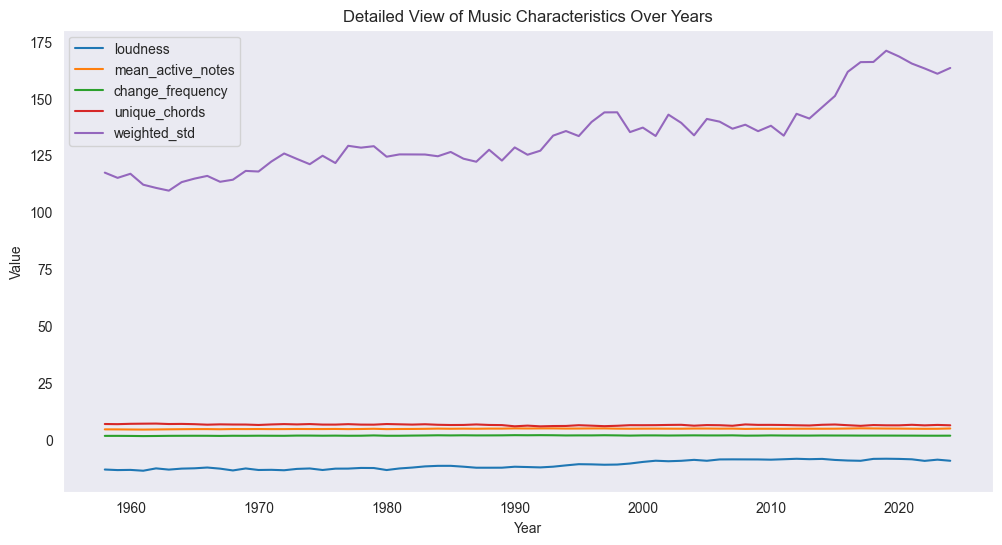

In [8]:
columns_to_plot = ["loudness", "mean_active_notes", "change_frequency", "unique_chords", "weighted_std"]
yearly_data = data.groupby("year")[columns_to_plot].mean()

plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(yearly_data.index, yearly_data[column], label=column)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Detailed View of Music Characteristics Over Years")
plt.legend()
plt.grid()
plt.show()


## Изменение громкости музыки по годам

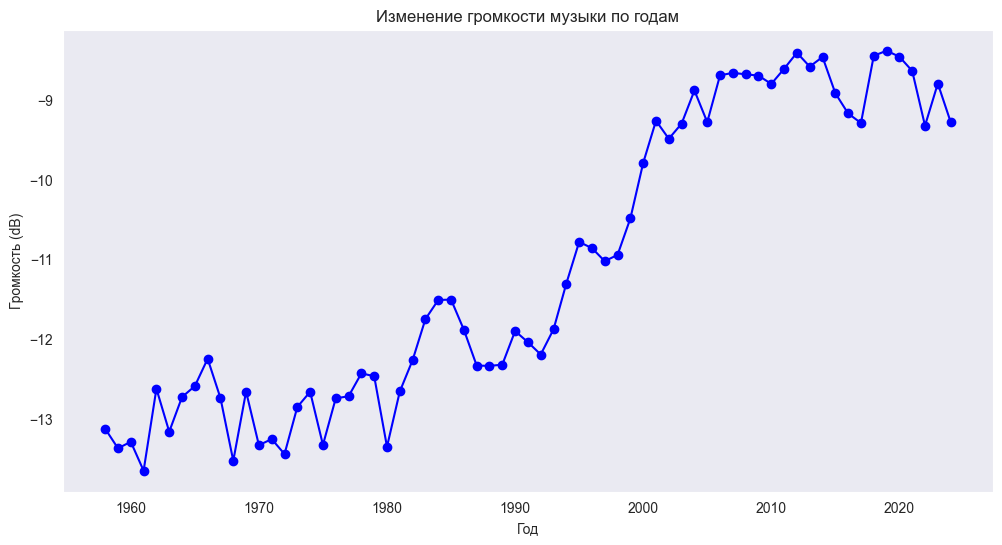

In [9]:
data_year_grouped = data.groupby('year')['loudness'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(data_year_grouped["year"], data_year_grouped["loudness"], marker="o", linestyle="-", color="b")
plt.xlabel("Год")
plt.ylabel("Громкость (dB)")
plt.title("Изменение громкости музыки по годам")
plt.grid()
plt.show()


## Изменение динамического диапазона по годам

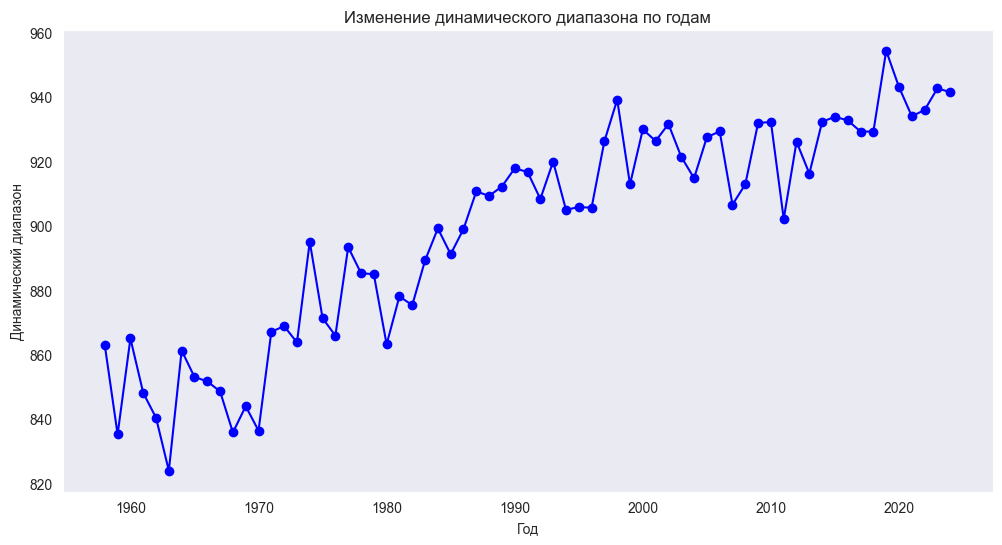

In [10]:
data_year_grouped_dynamic = data.groupby('year')['dynamic_range'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(data_year_grouped["year"], data_year_grouped_dynamic["dynamic_range"], marker="o", linestyle="-", color="b")

plt.xlabel("Год")
plt.ylabel("Динамический диапазон")
plt.title("Изменение динамического диапазона по годам")
plt.grid()
plt.show()


## Громкость и динамический диапазон по годам

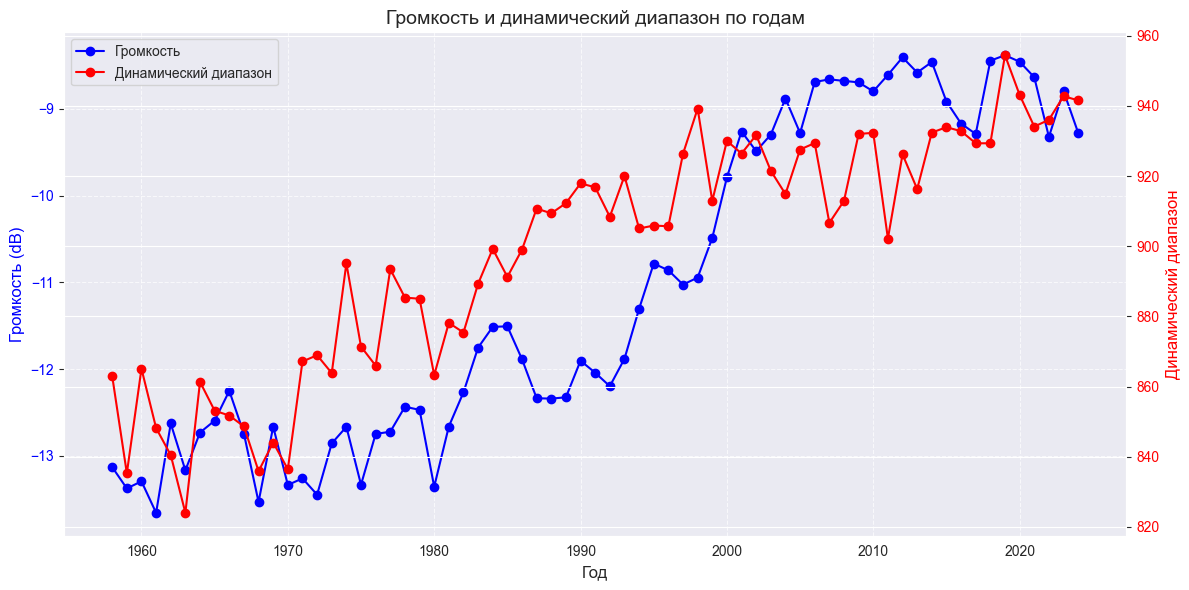

In [11]:
data_year_grouped_loudness = data.groupby('year')['loudness'].mean().reset_index()
data_year_grouped_dynamic = data.groupby('year')['dynamic_range'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'blue'
ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Громкость (dB)', fontsize=12, color=color)
ax1.plot(data_year_grouped_loudness["year"], data_year_grouped_loudness["loudness"],
         marker="o", linestyle="-", color=color, label="Громкость")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)


ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Динамический диапазон', fontsize=12, color=color)
ax2.plot(data_year_grouped_dynamic["year"], data_year_grouped_dynamic["dynamic_range"],
         marker="o", linestyle="-", color=color, label="Динамический диапазон")
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Громкость и динамический диапазон по годам', fontsize=14)
fig.tight_layout()


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

## Изменение среднего количества активных нот по годам

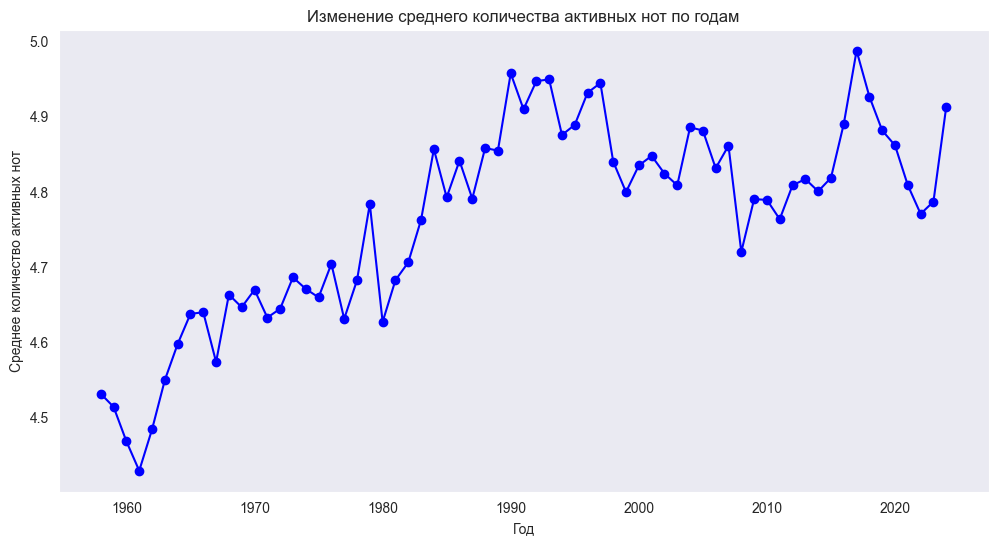

In [12]:
data_year_grouped_mean_active_notes = data.groupby('year')['mean_active_notes'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(data_year_grouped["year"], data_year_grouped_mean_active_notes["mean_active_notes"], marker="o", linestyle="-", color="b")

plt.xlabel("Год")
plt.ylabel("Среднее количество активных нот")
plt.title("Изменение среднего количества активных нот по годам")
plt.grid()
plt.show()


## Корреляция между громкостью и динамическим диапазоном

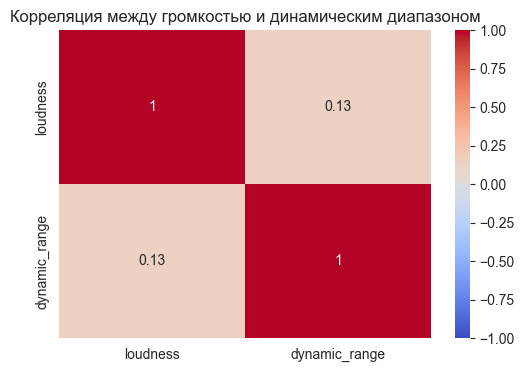

In [13]:
correlation = data[['loudness', 'dynamic_range']].corr()
correlation

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между громкостью и динамическим диапазоном')
plt.show()

## Анализ распределения

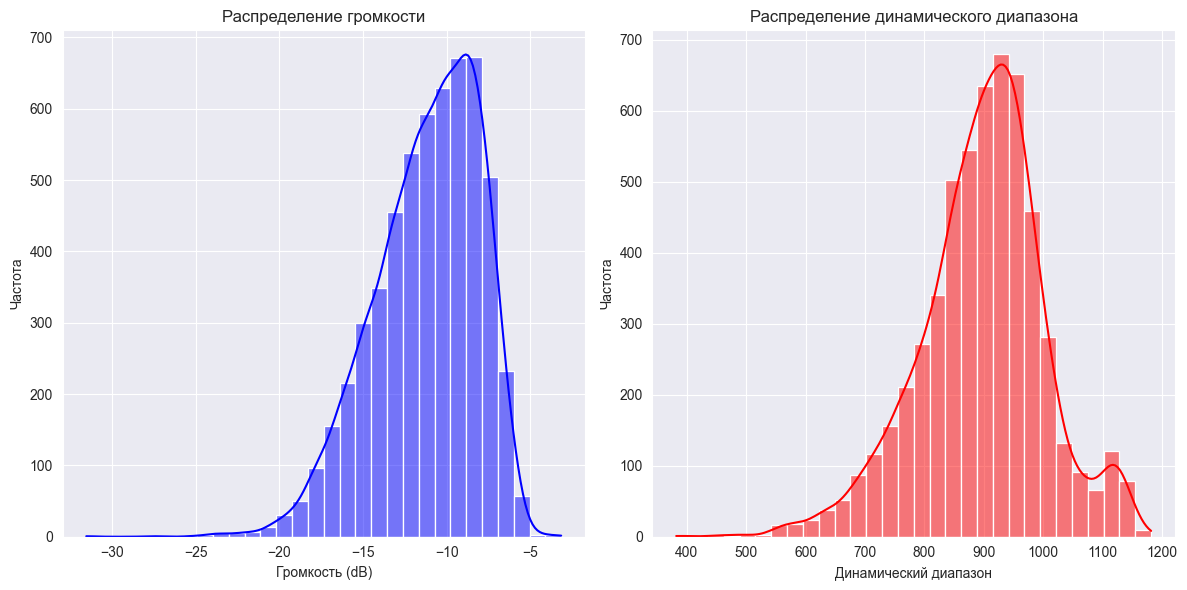

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['loudness'], bins=30, kde=True, color='blue')
plt.title('Распределение громкости')
plt.xlabel('Громкость (dB)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(data['dynamic_range'], bins=30, kde=True, color='red')
plt.title('Распределение динамического диапазона')
plt.xlabel('Динамический диапазон')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## Анализ уникальных аккордов и активных нот

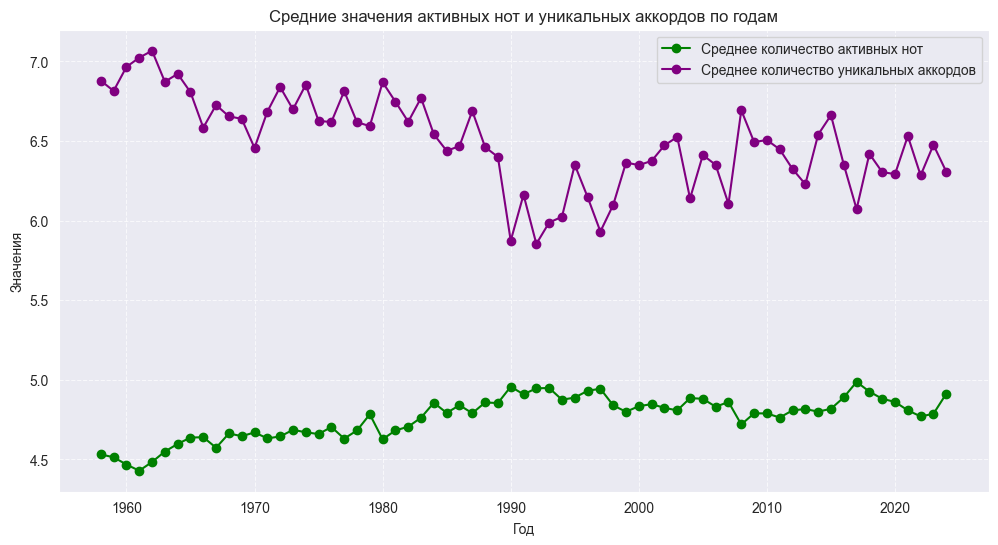

In [15]:
data_year_grouped_notes = data.groupby('year').agg({
    'mean_active_notes': 'mean',
    'unique_chords': 'mean'
}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(data_year_grouped_notes['year'], data_year_grouped_notes['mean_active_notes'],
         marker='o', linestyle='-', color='green', label='Среднее количество активных нот')
plt.plot(data_year_grouped_notes['year'], data_year_grouped_notes['unique_chords'],
         marker='o', linestyle='-', color='purple', label='Среднее количество уникальных аккордов')

plt.xlabel('Год')
plt.ylabel('Значения')
plt.title('Средние значения активных нот и уникальных аккордов по годам')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Анализ популярности песен

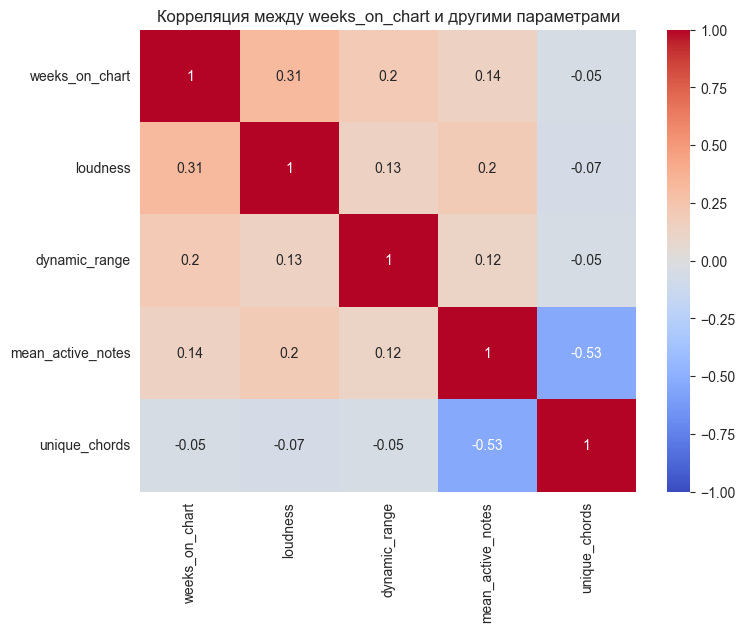

In [16]:
correlation_weeks = data[['weeks_on_chart', 'loudness', 'dynamic_range', 'mean_active_notes', 'unique_chords']].corr()
correlation_weeks

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_weeks, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между weeks_on_chart и другими параметрами')
plt.show()

## Анализ исполнителей по количеству песен в чарте

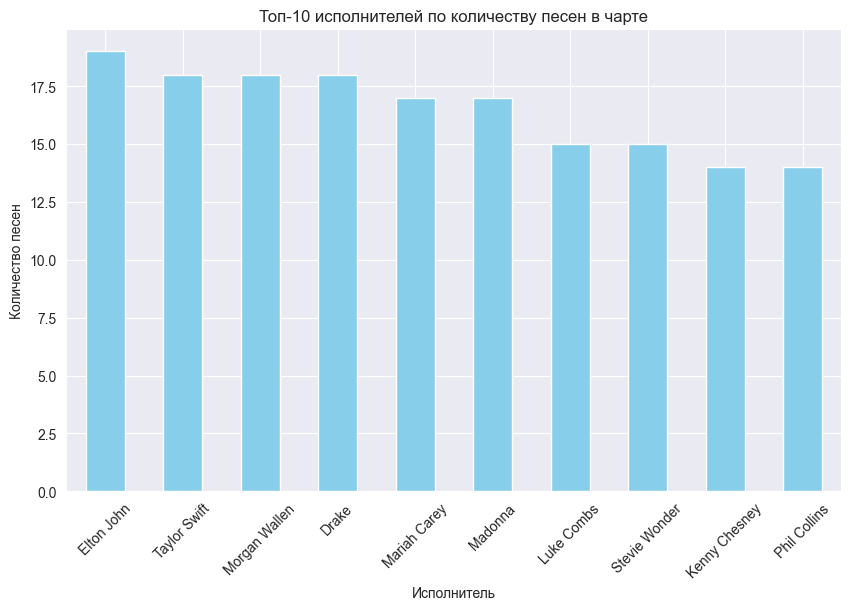

In [17]:
top_performers = data['performer'].value_counts().head(10)
top_performers


plt.figure(figsize=(10, 6))
top_performers.plot(kind='bar', color='skyblue')
plt.title('Топ-10 исполнителей по количеству песен в чарте')
plt.xlabel('Исполнитель')
plt.ylabel('Количество песен')
plt.xticks(rotation=45)
plt.show()

## Анализ корреляций между всеми числовыми признаками

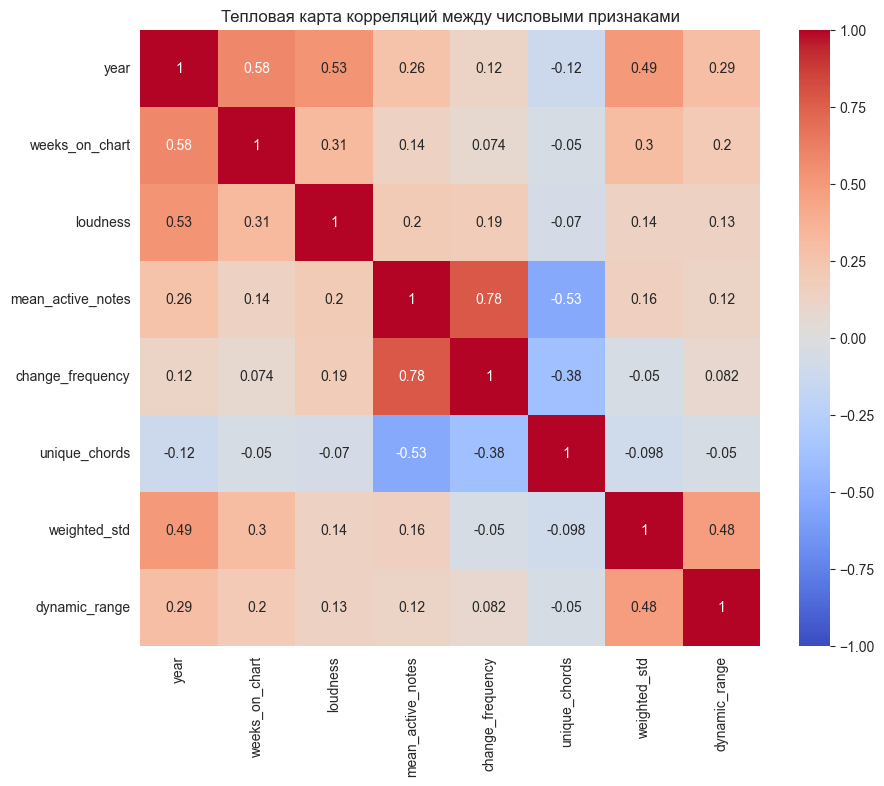

In [18]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций между числовыми признаками')
plt.show()

## Анализ зависимости громкости и динамического диапазона от года

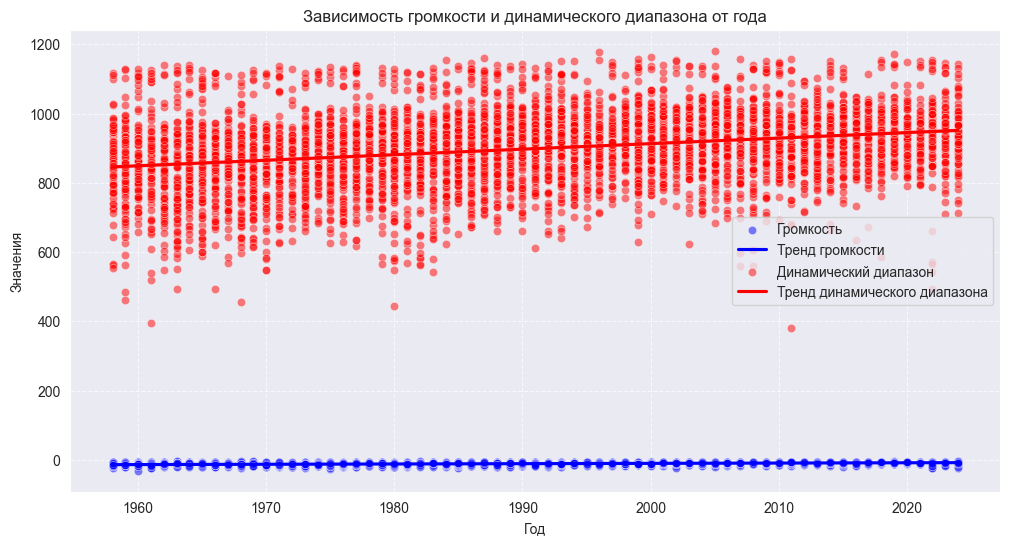

In [19]:
plt.figure(figsize=(12, 6))


sns.scatterplot(x='year', y='loudness', data=data, color='blue', alpha=0.5, label='Громкость')
sns.regplot(x='year', y='loudness', data=data, scatter=False, color='blue', label='Тренд громкости')


sns.scatterplot(x='year', y='dynamic_range', data=data, color='red', alpha=0.5, label='Динамический диапазон')
sns.regplot(x='year', y='dynamic_range', data=data, scatter=False, color='red', label='Тренд динамического диапазона')

plt.xlabel('Год')
plt.ylabel('Значения')
plt.title('Зависимость громкости и динамического диапазона от года')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Кластеризация данных по громкости и динамическому диапазону


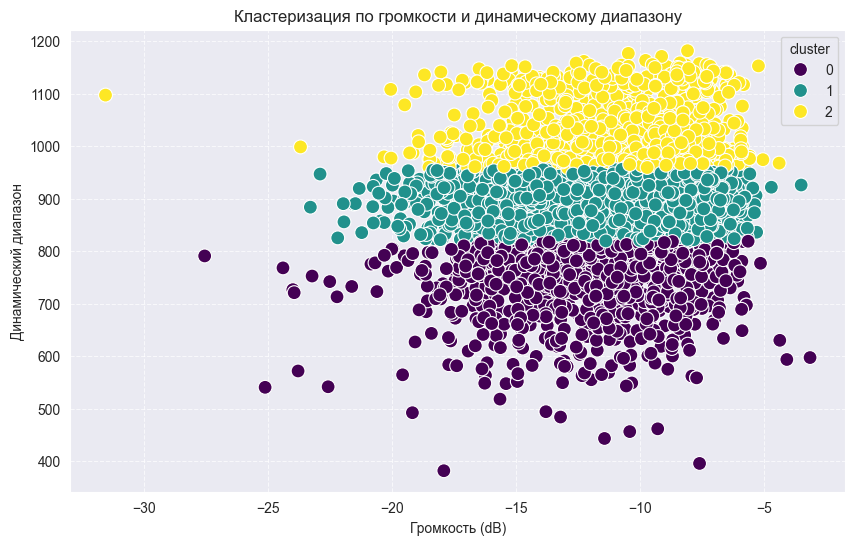

In [20]:
from sklearn.cluster import KMeans
X = data[['loudness', 'dynamic_range']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='dynamic_range', hue='cluster', data=data, palette='viridis', s=100)
plt.title('Кластеризация по громкости и динамическому диапазону')
plt.xlabel('Громкость (dB)')
plt.ylabel('Динамический диапазон')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Описание столбцов

In [21]:
selected_columns = ['mean_active_notes', 'change_frequency', 'unique_chords', 'weighted_std', 'dynamic_range']
data[selected_columns].describe()

,mean_active_notes,change_frequency,unique_chords,weighted_std,dynamic_range
count,5590.000000,5590.000000,5590.000000,5590.000000,5590.000000
mean,4.760100,1.794873,6.506261,132.352535,897.150607
std,0.377361,0.344149,1.442603,28.740520,105.509622
min,3.382594,0.367951,2.000000,45.075549,382.022256
25%,4.510665,1.559472,6.000000,112.089713,838.747275
50%,4.731781,1.787907,7.000000,129.613271,905.216047
75%,4.994601,2.016994,8.000000,149.228858,961.616040
max,6.487039,3.251429,8.000000,289.106549,1181.615922


## Корреляционный анализ

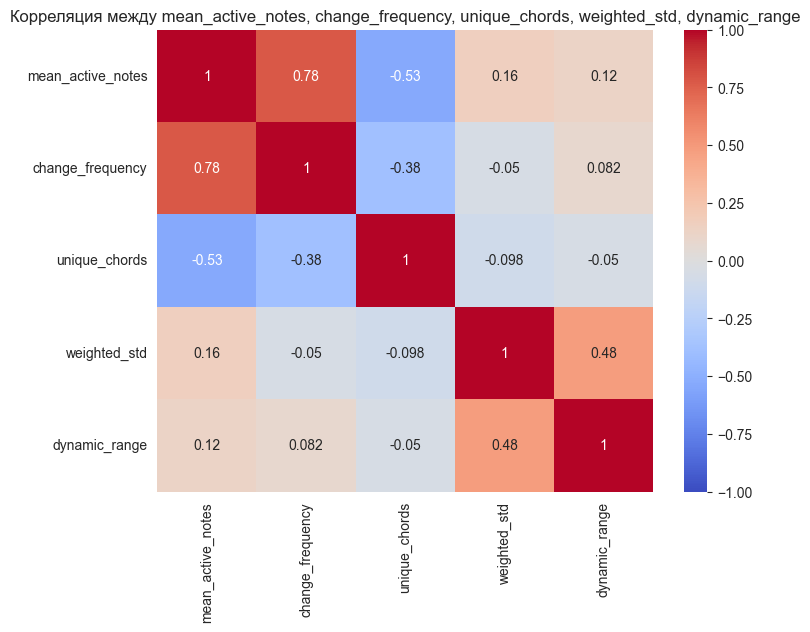

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между mean_active_notes, change_frequency, unique_chords, weighted_std, dynamic_range')
plt.show()

## Визуализация распределений

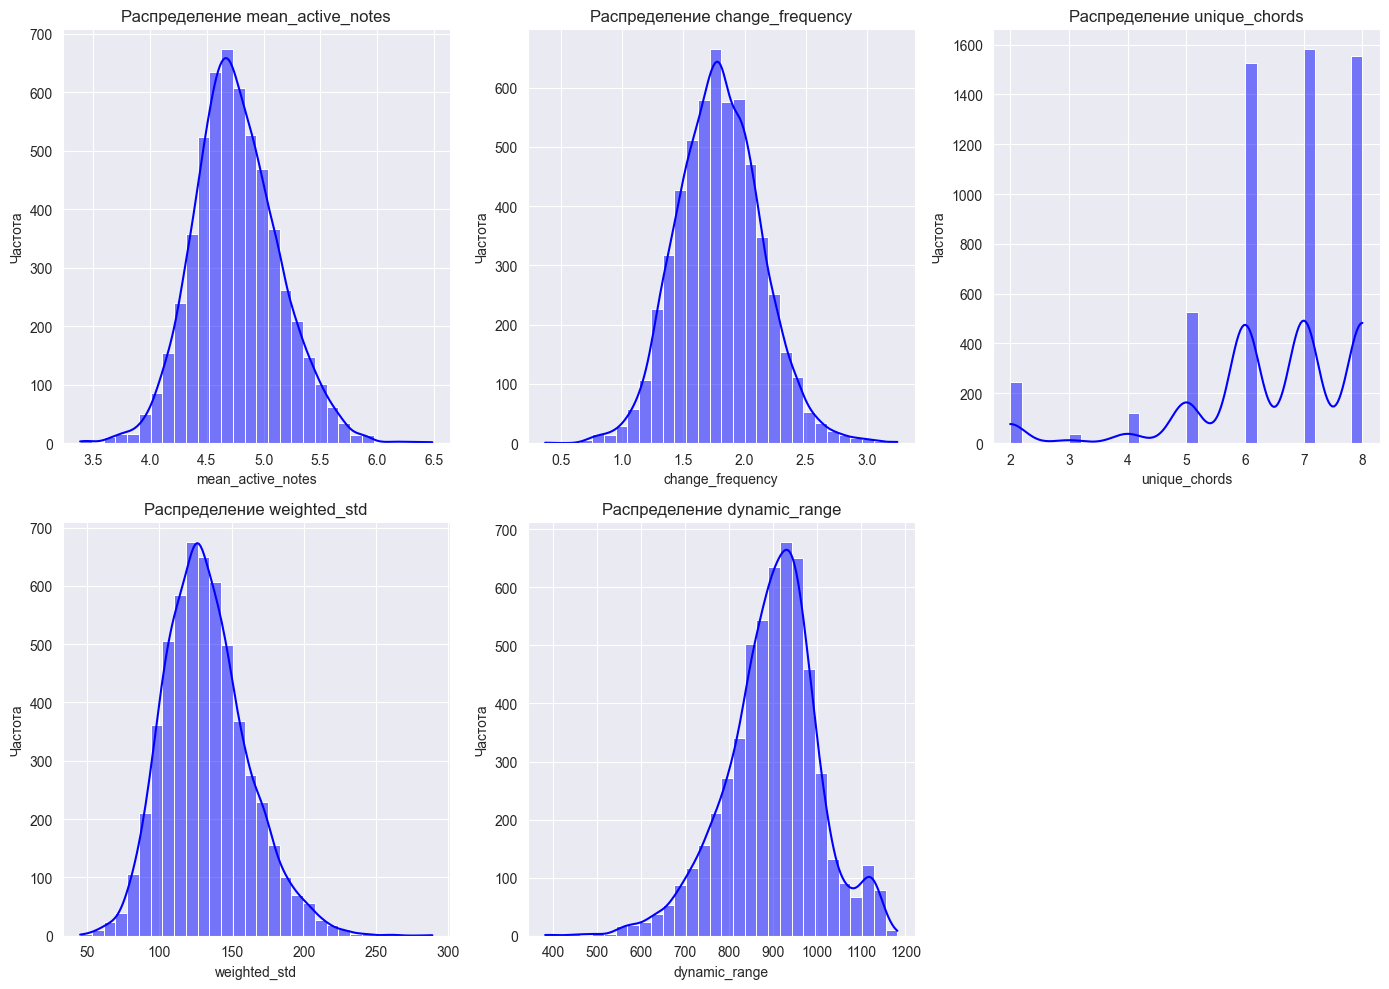

In [23]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()



## Анализ зависимостей между признаками

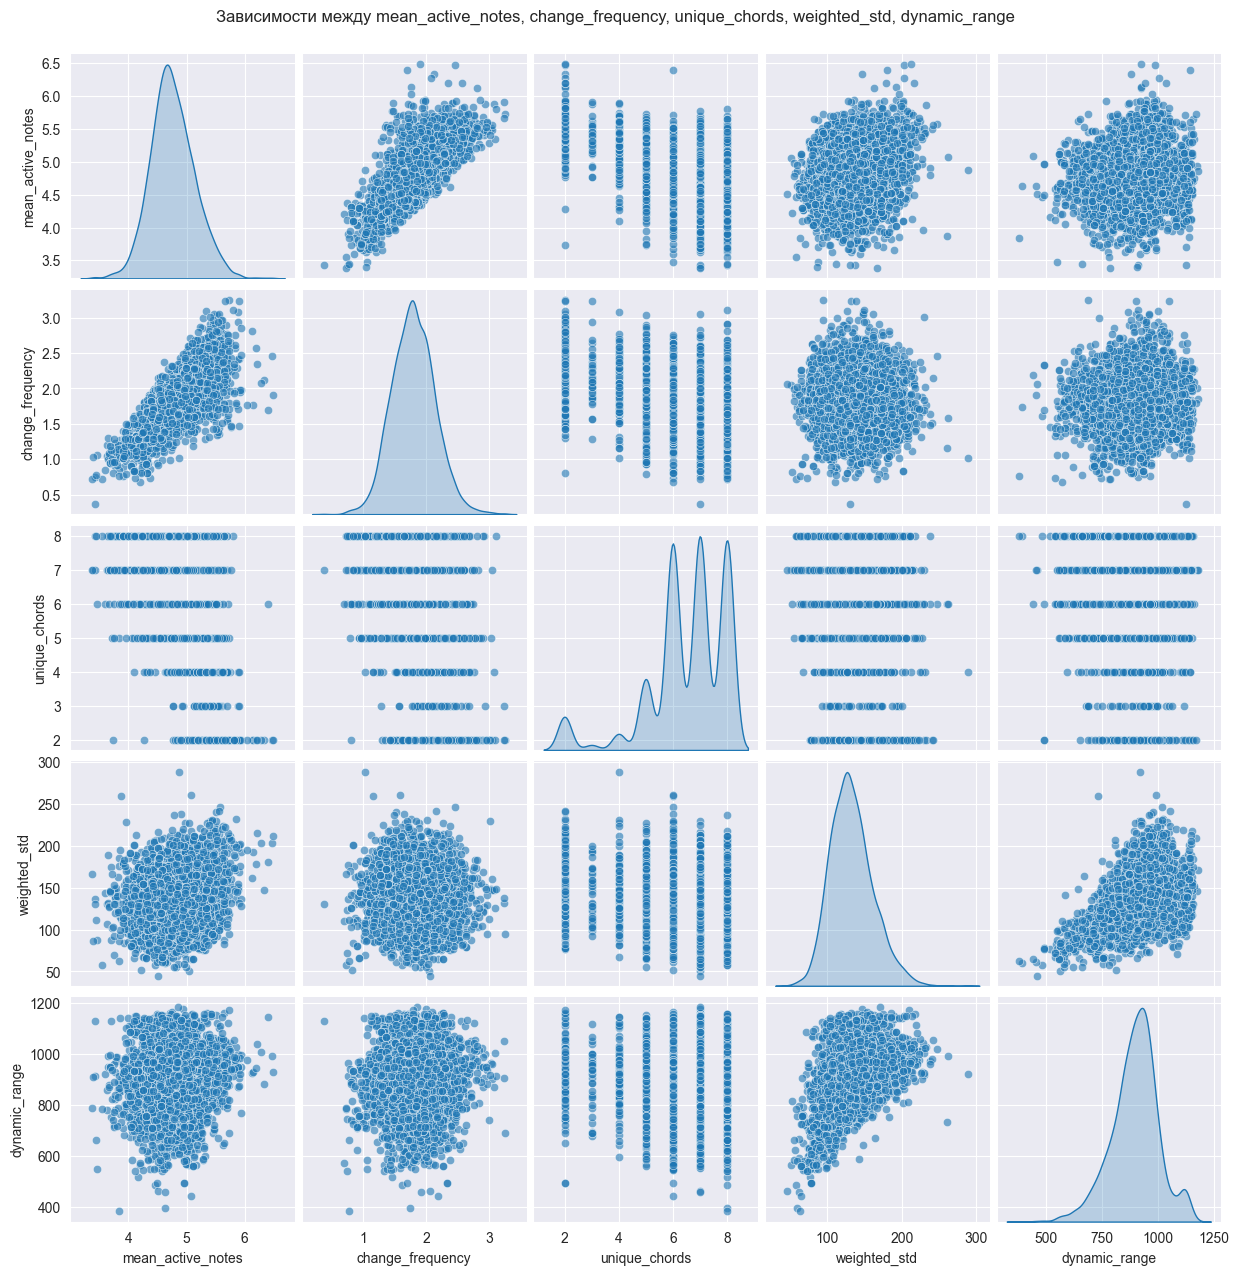

In [24]:
sns.pairplot(data[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Зависимости между mean_active_notes, change_frequency, unique_chords, weighted_std, dynamic_range', y=1.02)
plt.show()

## Анализ уникальных аккордов и активных нот

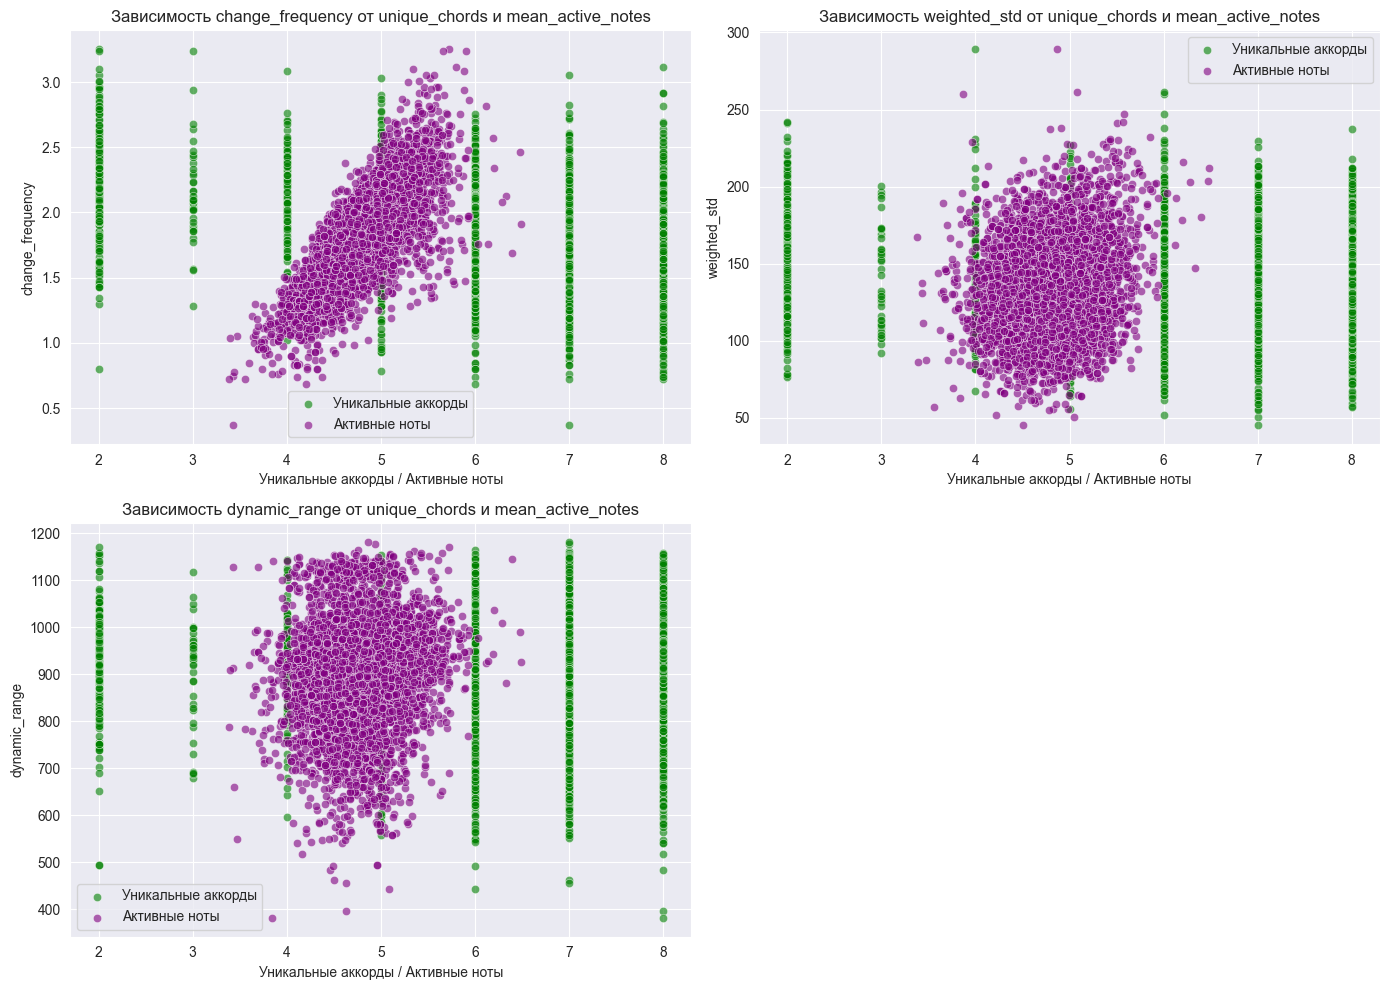

In [25]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(['change_frequency', 'weighted_std', 'dynamic_range'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='unique_chords', y=column, data=data, color='green', alpha=0.6, label='Уникальные аккорды')
    sns.scatterplot(x='mean_active_notes', y=column, data=data, color='purple', alpha=0.6, label='Активные ноты')
    plt.title(f'Зависимость {column} от unique_chords и mean_active_notes')
    plt.xlabel('Уникальные аккорды / Активные ноты')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


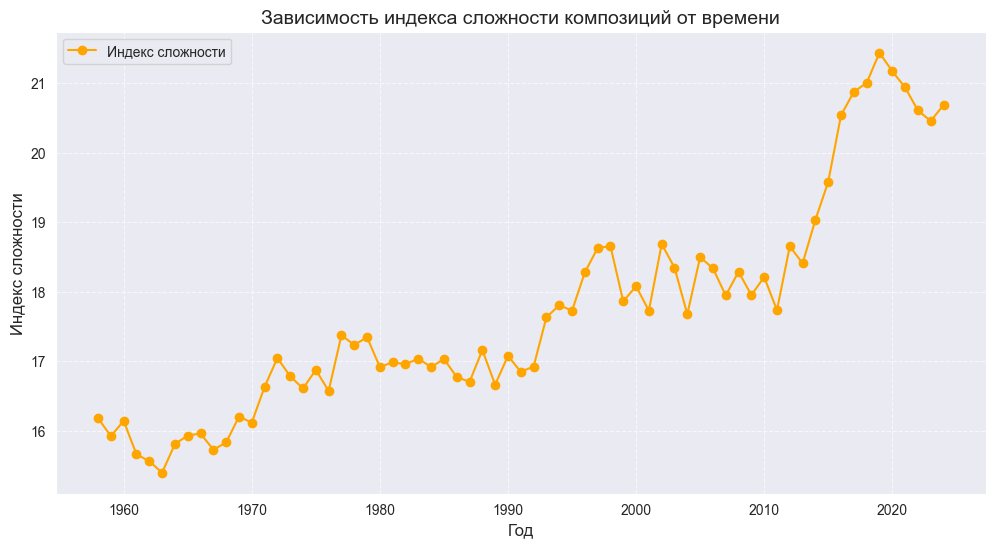

In [26]:
data_year_grouped = data.groupby('year').agg({
    'unique_chords': 'mean',
    'mean_active_notes': 'mean',
    'change_frequency': 'mean',
    'weighted_std': 'mean'
}).reset_index()

# Создаем индекс сложности как взвешенное среднее, коэффиценты примерно подбираем
data_year_grouped['complexity_index'] = (
        data_year_grouped['unique_chords'] * 0.4 +
        data_year_grouped['mean_active_notes'] * 0.3 +
        data_year_grouped['change_frequency'] * 0.2 +
        data_year_grouped['weighted_std'] * 0.1
)


plt.figure(figsize=(12, 6))
plt.plot(data_year_grouped['year'], data_year_grouped['complexity_index'],
         marker='o', linestyle='-', color='orange', label='Индекс сложности')


plt.xlabel('Год', fontsize=12)
plt.ylabel('Индекс сложности', fontsize=12)
plt.title('Зависимость индекса сложности композиций от времени', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()